In [1]:
import numpy as np 
import pandas as pd
import os
print(os.listdir("./cell_images"))

['Parasitized', 'Uninfected']


In [2]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
parasitized_data = os.listdir('./cell_images/Parasitized/')
print(parasitized_data[:10]) 

uninfected_data = os.listdir('./cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C181P142ThinF_IMG_20151127_160514_cell_166.png', 'C78P39ThinF_IMG_20150606_104936_cell_174.png', 'C80P41ThinF_IMG_20150817_111943_cell_5.png', 'C180P141NThinF_IMG_20151201_163751_cell_166.png', 'C48P9thinF_IMG_20150721_164031_cell_22.png', 'C184P145ThinF_IMG_20151203_102543_cell_173.png', 'C101P62ThinF_IMG_20150918_151507_cell_76.png', 'C189P150ThinF_IMG_20151203_141901_cell_77.png', 'C60P21thinF_IMG_20150804_113011_cell_8.png', 'C82P43ThinF_IMG_20150817_124010_cell_200.png']


['C239ThinF_IMG_20151127_113253_cell_73.png', 'C94P55ThinF_IMG_20150821_165519_cell_157.png', 'C133P94ThinF_IMG_20151004_154351_cell_58.png', 'C224ThinF_IMG_20151112_112735_cell_201.png', 'C178P139NThinF_IMG_20151201_155012_cell_83.png', 'C153P114ThinF_IMG_20151115_135639_cell_4.png', 'C155P116ThinF_IMG_20151115_143125_cell_75.png', 'C66P27N_ThinF_IMG_20150818_164702_cell_128.png', 'C54P15thinF_IMG_20150728_112832_cell_56.png', 'C104P65ThinF_IMG_20150918_172247_cell_126.png']


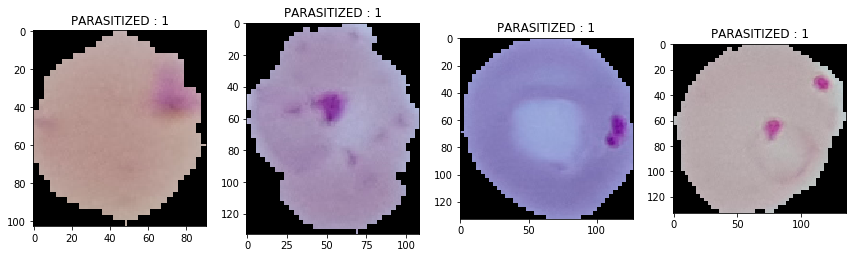

In [4]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('./cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

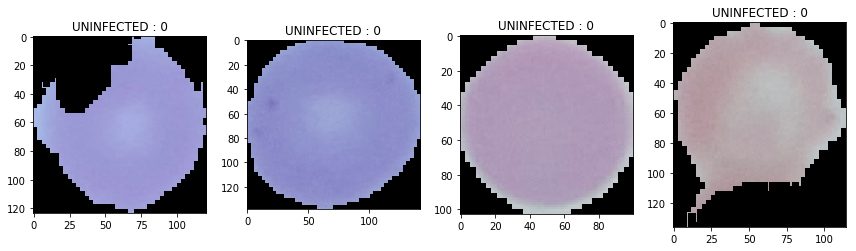

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('./cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [6]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('./cell_images/Parasitized/' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('./cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

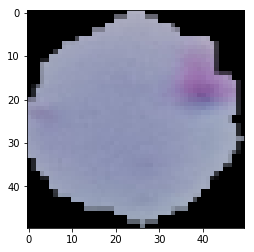

In [7]:
plt.imshow(data[0])
plt.show()

In [8]:
image_data = np.array(data)
labels = np.array(labels)

In [ ]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [ ]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [20]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


In [44]:
import keras
from keras.layers import Dense, Conv2D, Input
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential, Model
from keras import backend as K
from keras.optimizers import SGD

from keras import optimizers

In [22]:
## MODEL CNN
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [53]:
## MODEL MLP
def MLPbuild(height, width, classes, channels):
    inputs = Input(shape=(height * width * channels, ))
    h_layer = Dense(128, activation='relu')(inputs)
    h_layer = Dense(64, activation='relu')(h_layer)
    outputs = Dense(classes, activation='softmax')(h_layer)
    model = Model(inputs=inputs, outputs=outputs)

    
    return model

In [64]:
#instantiate the model
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 11, 11, 32)        128       
__________

In [65]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [66]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
22046/22046 [==============================] - 9s 431us/step - loss: 0.5681 - acc: 0.7574
Epoch 2/20
22046/22046 [==============================] - 8s 362us/step - loss: 0.2219 - acc: 0.9138
Epoch 3/20
22046/22046 [==============================] - 8s 349us/step - loss: 0.1919 - acc: 0.9314
Epoch 4/20
22046/22046 [==============================] - 8s 368us/step - loss: 0.1723 - acc: 0.9409
Epoch 5/20
22046/22046 [==============================] - 8s 368us/step - loss: 0.1658 - acc: 0.9444
Epoch 6/20
22046/22046 [==============================] - 8s 357us/step - loss: 0.1622 - acc: 0.9460
Epoch 7/20
22046/22046 [==============================] - 8s 353us/step - loss: 0.1579 - acc: 0.9472
Epoch 8/20
22046/22046 [==============================] - 8s 367us/step - loss: 0.1529 - acc: 0.9492
Epoch 9/20
22046/22046 [==============================] - 8s 355us/step - loss: 0.1524 - acc: 0.9495
Epoch 10/20
22046/22046 [==============================] - 8s 350us/step - loss: 0.1433 - a

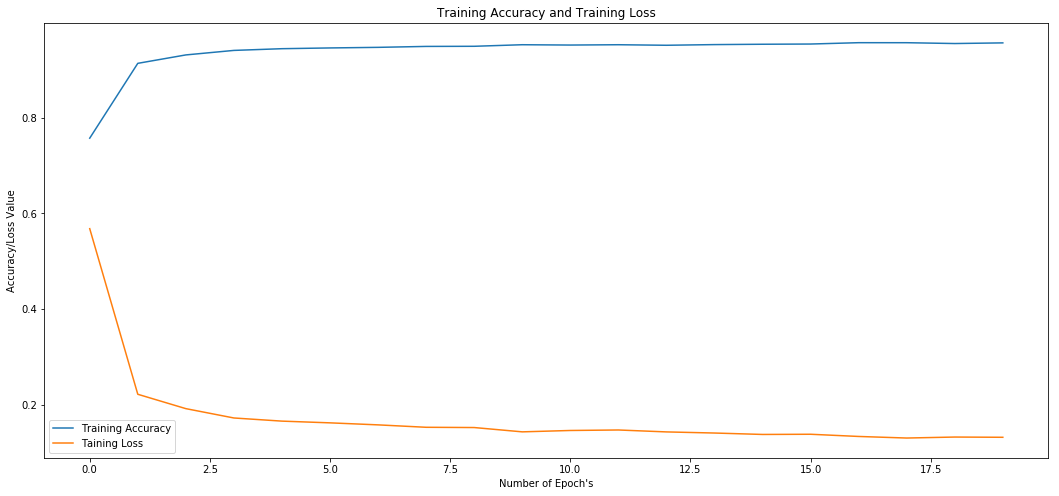

In [67]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['acc'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')

plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [79]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

5512/5512 [==============================] - 1s 117us/step


In [80]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.12509893179372364
ACCURACY : 0.9600870827285921


In [60]:
#instantiate the model MLP
height = 50
width = 50
classes = 2
channels = 3
model_mlp = MLPbuild(height = height, width = width, classes = classes, channels = channels)
model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 7500)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               960128    
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 130       
Total params: 968,514
Trainable params: 968,514
Non-trainable params: 0
_________________________________________________________________


In [61]:
sgd = SGD(lr=0.001)
model_mlp.compile(optimizer=sgd, loss='mse', metrics = ['accuracy'])

In [62]:
x_train_mlp = np.reshape(x_train, (x_train.shape[0], height*width*channels,))

In [71]:
#fit the model onto the dataset
h_mlp = model_mlp.fit(x_train_mlp, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
22046/22046 [==============================] - 3s 117us/step - loss: 0.1966 - acc: 0.7030
Epoch 2/20
22046/22046 [==============================] - 3s 114us/step - loss: 0.1964 - acc: 0.7039
Epoch 3/20
22046/22046 [==============================] - 3s 114us/step - loss: 0.1959 - acc: 0.7059
Epoch 4/20
22046/22046 [==============================] - 2s 112us/step - loss: 0.1953 - acc: 0.7044
Epoch 5/20
22046/22046 [==============================] - 3s 122us/step - loss: 0.1950 - acc: 0.7102
Epoch 6/20
22046/22046 [==============================] - 3s 127us/step - loss: 0.1945 - acc: 0.7092
Epoch 7/20
22046/22046 [==============================] - 3s 128us/step - loss: 0.1944 - acc: 0.7087
Epoch 8/20
22046/22046 [==============================] - 3s 125us/step - loss: 0.1936 - acc: 0.7094
Epoch 9/20
22046/22046 [==============================] - 3s 118us/step - loss: 0.1933 - acc: 0.7097
Epoch 10/20
22046/22046 [==============================] - 3s 124us/step - loss: 0.1927 - a

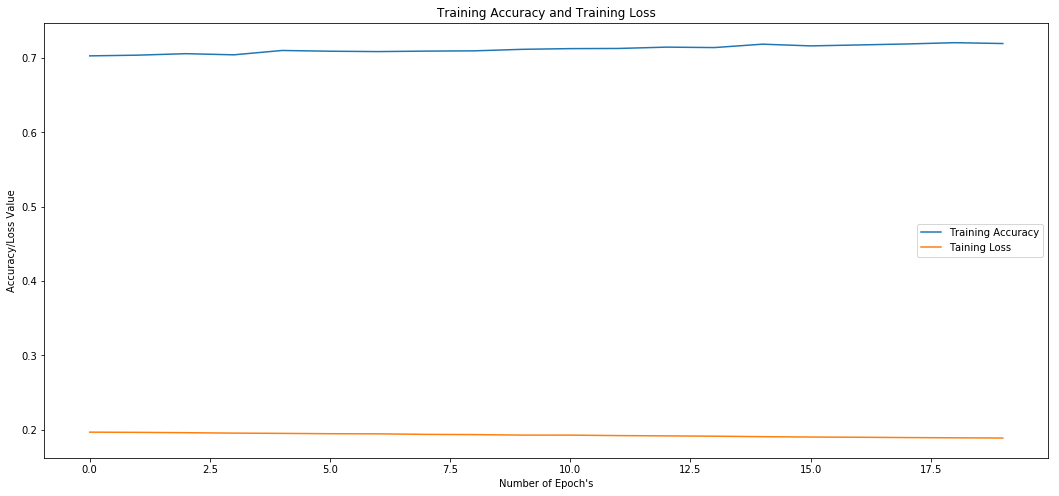

In [72]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h_mlp.history['acc'], label = 'Training Accuracy')
plt.plot(range(20), h_mlp.history['loss'], label = 'Taining Loss')

plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [77]:
#evaluate the model on test data
x_test_mlp = np.reshape(x_test, (x_test.shape[0], height * width * channels, ))
predictions_mlp = model_mlp.evaluate(x_test_mlp, y_test)

5512/5512 [==============================] - 0s 72us/step


In [78]:
print(f'LOSS : {predictions_mlp[0]}')
print(f'ACCURACY : {predictions_mlp[1]}')

LOSS : 0.19644585753559893
ACCURACY : 0.70355587808418
